# KNN Classifier
## Author - Dev

Importing all the needed modules : 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing, neighbors, model_selection, metrics

**Data Reading**

In [3]:
df = pd.read_csv("/Users/devmarwah/Downloads/UniversalBank.csv")

Printing head and shape of the data to have a look at it : 

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

**Data Preparation**

We will be dropping ID and ZIP code since they are irrelavent to the target variable **Personal Loan**

In [6]:
df.drop(["ID","ZIP Code"], axis=1,inplace = True)

In [7]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Here, the factor education has more than 2 categories (3). Therefore, we need to convert it into dummy variables for Knn algorithm to be able to work the right way.

In [8]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

We need to be converting Education to a cateorical variable to convert it into dummy variables.

In [10]:
df["Education"] = df["Education"].astype("category")
df["Education"].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [15]:
df.dtypes

Age                   int64
Experience            int64
Income                int64
Family                int64
CCAvg                 int64
Mortgage              int64
Personal Loan         int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
Education_1           int64
Education_2           int64
Education_3           int64
dtype: object

In [11]:
df=pd.get_dummies(df,"Education").astype("int")

Verifying dummies by displaying head of the dataframe : 

In [12]:
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1,0,0,0,0,0,1,0,1,0


We can observe above that the factor "Education" has been converted to three dummy variables.

Normalizing Data

In [17]:
df_norm = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df.iloc[:,np.r_[0:6,7:11]]))

In [19]:
df.iloc[:,np.r_[0:6,7:11]] = df_norm

In [20]:
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,-1.774417,-1.666078,-0.538229,1.397414,-0.295024,-0.555524,0,2.928915,-0.25354,-1.216618,-0.645314,1,0,0
1,-0.029524,-0.096330,-0.864109,0.525991,-0.295024,-0.555524,0,2.928915,-0.25354,-1.216618,-0.645314,1,0,0
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.295024,-0.555524,0,-0.341423,-0.25354,-1.216618,-0.645314,1,0,0
3,-0.901970,-0.968413,0.569765,-1.216855,0.279176,-0.555524,0,-0.341423,-0.25354,-1.216618,-0.645314,0,1,0
4,-0.901970,-1.055621,-0.625130,1.397414,-0.295024,-0.555524,0,-0.341423,-0.25354,-1.216618,1.549632,0,1,0


**Model Construction**

Splitting data into training and testing data : 

In [23]:
x = np.array(df.drop("Personal Loan",axis=1))
y = np.array(df["Personal Loan"])
t=model_selection.train_test_split
x_train,x_test, y_train ,y_test = t(x,y,test_size=0.2,random_state=2)

Training model for a range of k to find the optimal value of k 

In [28]:
# Setting a range of values for k
k_values = range(1,11)
# Making empty list for accuracies
accuracies = []
# Training the model 
for k in k_values:
    clf=neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train,y_train)
    accuracy = clf.score(x_test,y_test)
    accuracies.append(accuracy)

Plotting accuracies vs k values to get the optimal value of k 

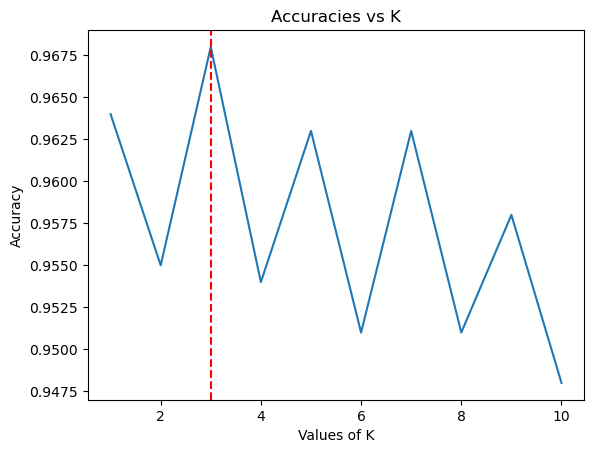

In [30]:
plt.plot(k_values,accuracies)
plt.title("Accuracies vs K")
plt.xlabel('Values of K')
plt.ylabel("Accuracy")
plt.axvline(x=3,color="r",linestyle="--")

Highest accuracy is for the value of k so we will train our model for k=3

In [31]:
clf=neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Finding accuracy of the model

In [33]:
print("Accuracy :",clf.score(x_test,y_test))

Accuracy : 0.968


**Hence, our model is 96.8% accurate**

Making predictions using this model

In [34]:
p = clf.predict(x_test)

Making confusion matrix of final results : 

Text(50.722222222222214, 0.5, 'Predicted Values')

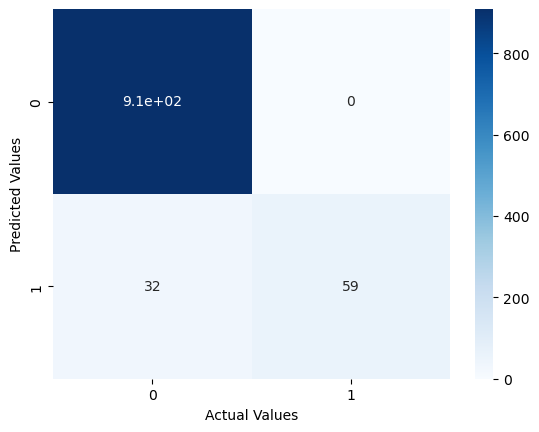

In [37]:
cm = metrics.confusion_matrix(y_test,p)
plt.figure()
sb.heatmap(cm,cmap="Blues",xticklabels=["0","1"],yticklabels=["0","1"],annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")